## ML ,DL, BERT Model Performance Comparision for web service categories

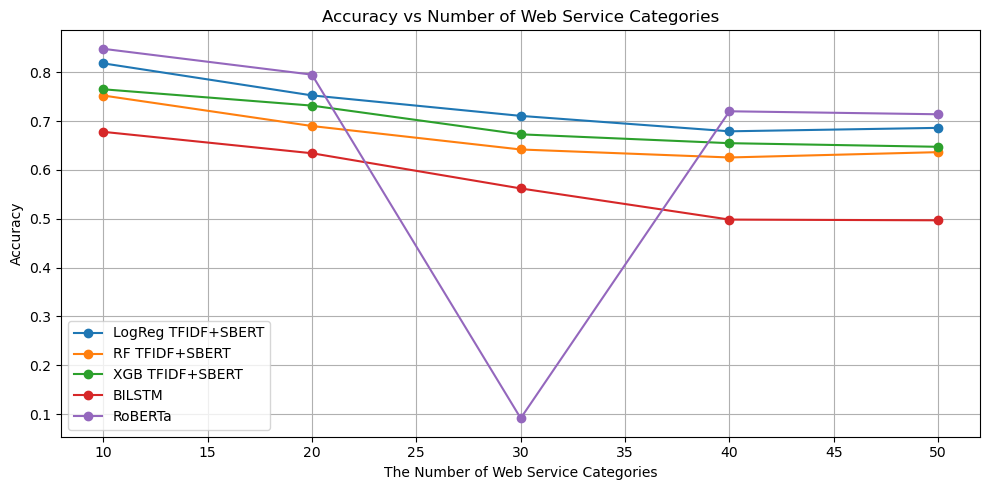

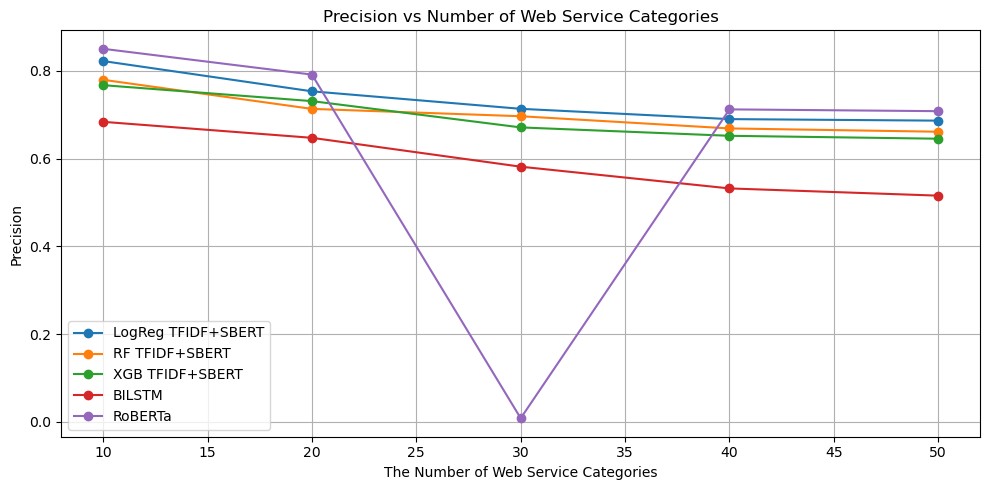

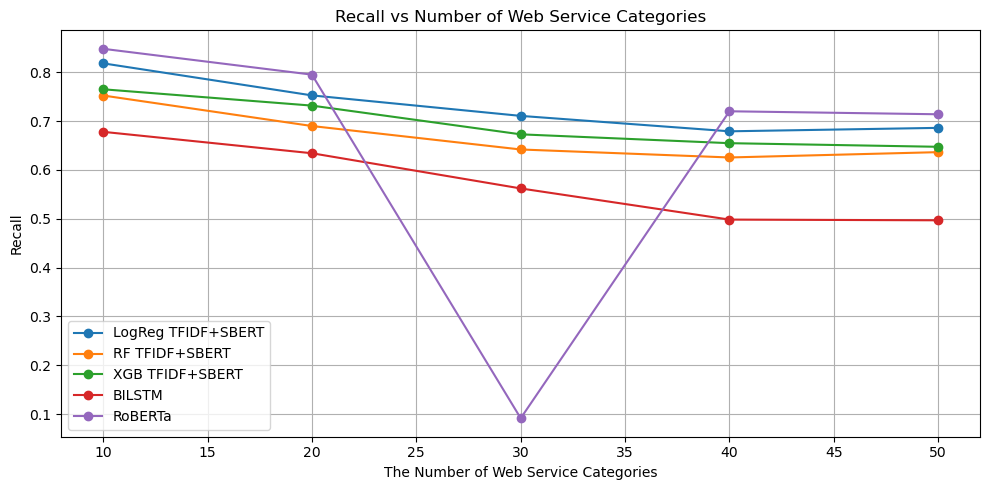

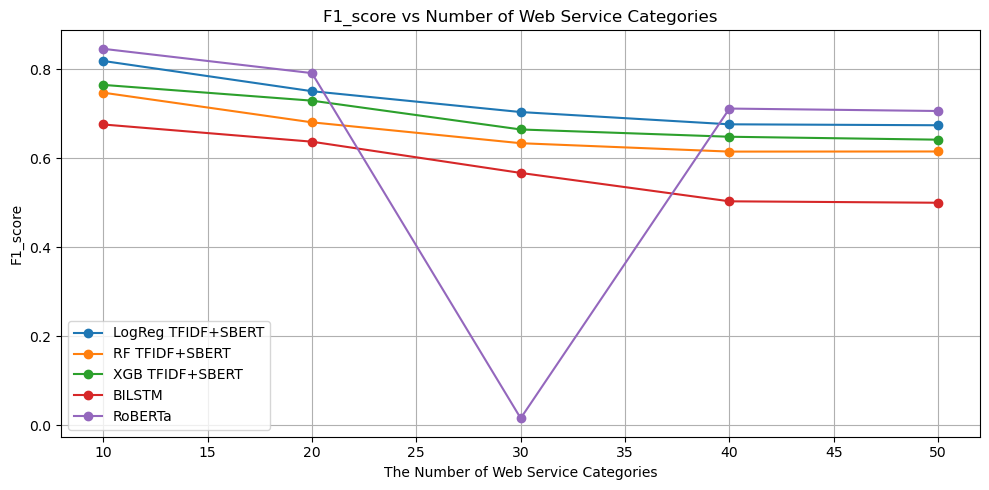

In [12]:
import pickle
import matplotlib.pyplot as plt
import seaborn


with open("results/ml_final_results.pkl", "rb") as f:
    ml_final_results = pickle.load(f)
    
with open("results/dl_final_results.pkl", "rb") as f:
    dl_final_results = pickle.load(f)
    
with open("results/bert_roberta_results.pkl", "rb") as f:
    bert_results = pickle.load(f)
    
bert_final_results = {
    n: [{
        "model": "RoBERTa Top " + str(n),
        "accuracy": results["accuracy"],
        "precision": results["precision"],
        "recall": results["recall"],
        "f1_score": results["f1_score"]
    }]
    for n, results in bert_results.items()
}
        
model_metrics = {}

for n, results in ml_final_results.items():
    for entry in results:
        model = entry['model'].split('Top')[0].strip()  
        if model not in model_metrics:
            model_metrics[model] = {'n': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}
        
        model_metrics[model]['n'].append(n)
        model_metrics[model]['accuracy'].append(entry['accuracy'])
        model_metrics[model]['precision'].append(entry['precision'])
        model_metrics[model]['recall'].append(entry['recall'])
        model_metrics[model]['f1_score'].append(entry['f1_score'])

for n, results in dl_final_results.items():
    for entry in results:
        model = entry['model'].split('Top')[0].strip()  
        if model not in model_metrics:
            model_metrics[model] = {'n': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}
        
        model_metrics[model]['n'].append(n)
        model_metrics[model]['accuracy'].append(entry['accuracy'])
        model_metrics[model]['precision'].append(entry['precision'])
        model_metrics[model]['recall'].append(entry['recall'])
        model_metrics[model]['f1_score'].append(entry['f1_score'])   

for n, results in bert_final_results.items():
    for entry in results:
        model = entry['model'].split('Top')[0].strip()  
        if model not in model_metrics:
            model_metrics[model] = {'n': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}
        
        model_metrics[model]['n'].append(n)
        model_metrics[model]['accuracy'].append(entry['accuracy'])
        model_metrics[model]['precision'].append(entry['precision'])
        model_metrics[model]['recall'].append(entry['recall'])
        model_metrics[model]['f1_score'].append(entry['f1_score']) 
        
def plot_metric(metric_name):
    plt.figure(figsize=(10, 5))
    for model, data in model_metrics.items():
        plt.plot(data['n'], data[metric_name], marker='o', label=model)
    plt.title(f'{metric_name.capitalize()} vs Number of Web Service Categories')
    plt.xlabel('The Number of Web Service Categories')
    plt.ylabel(metric_name.capitalize())
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_metric('accuracy')
plot_metric('precision')
plot_metric('recall')
plot_metric('f1_score')

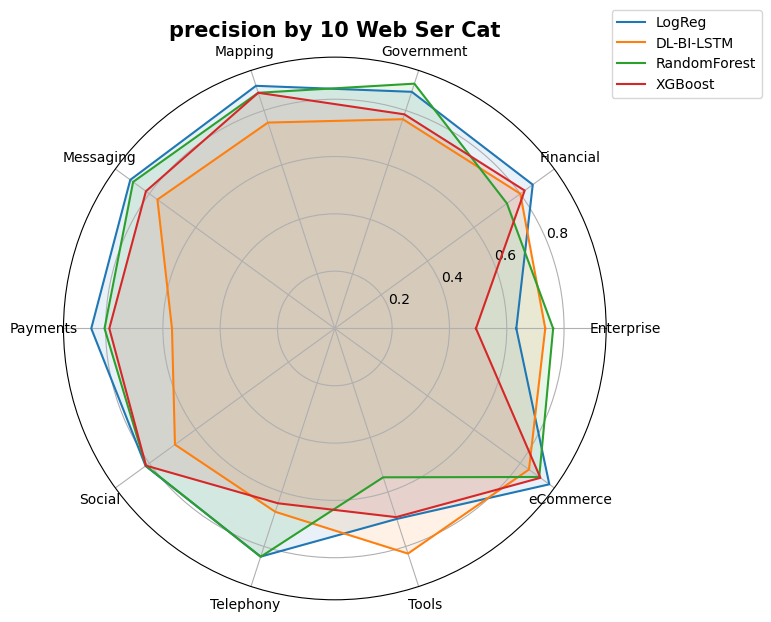

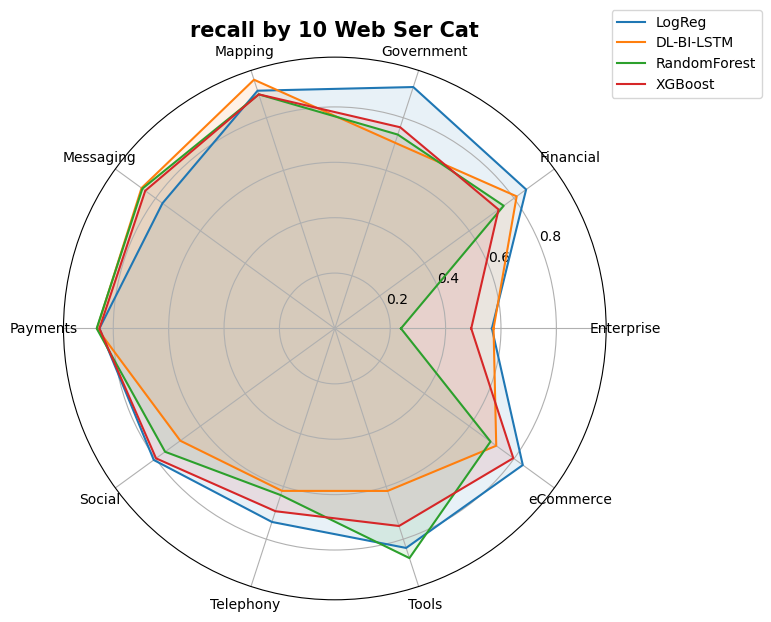

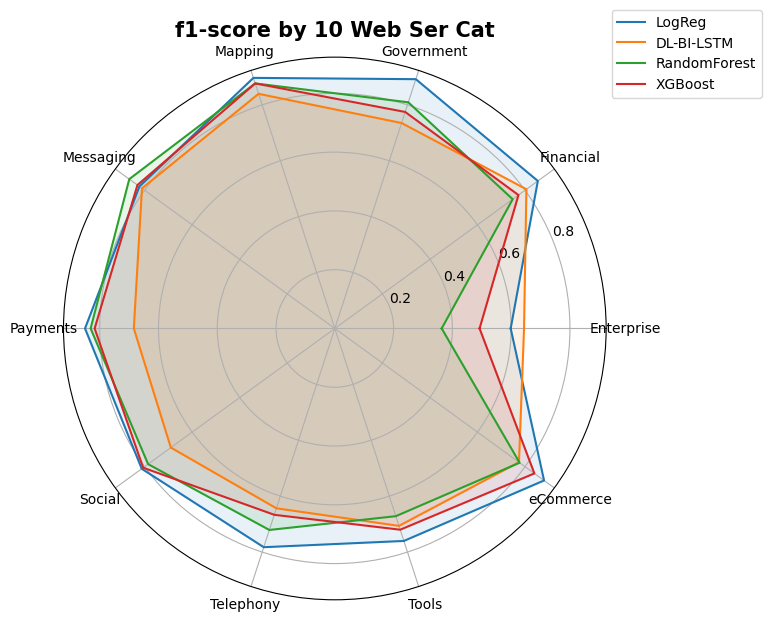

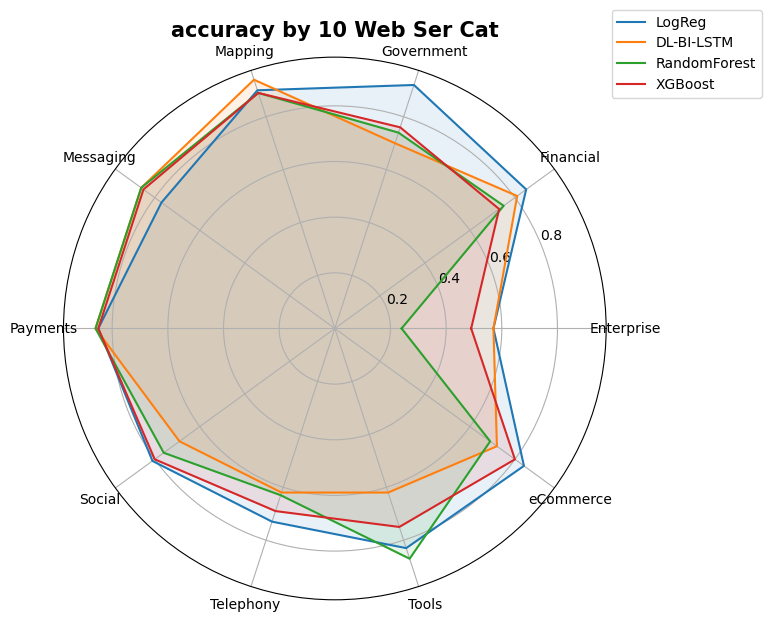

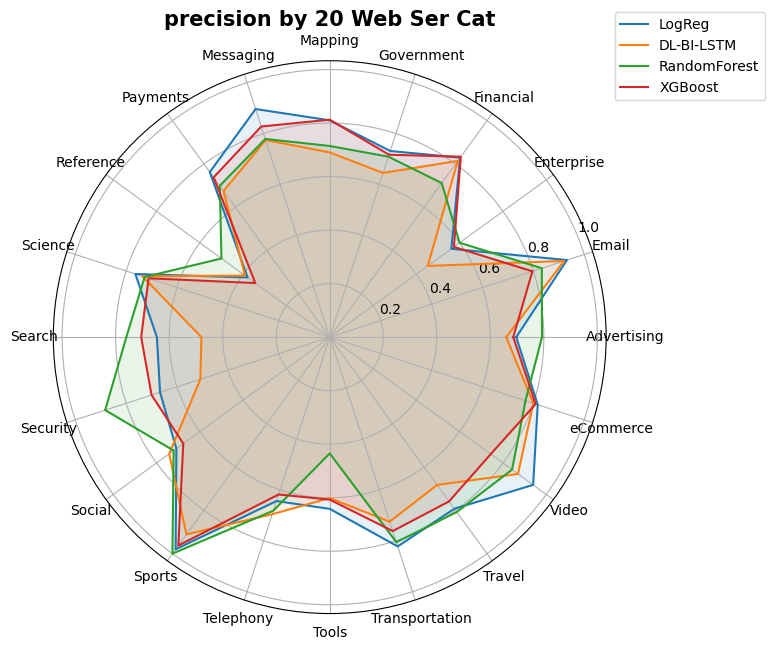

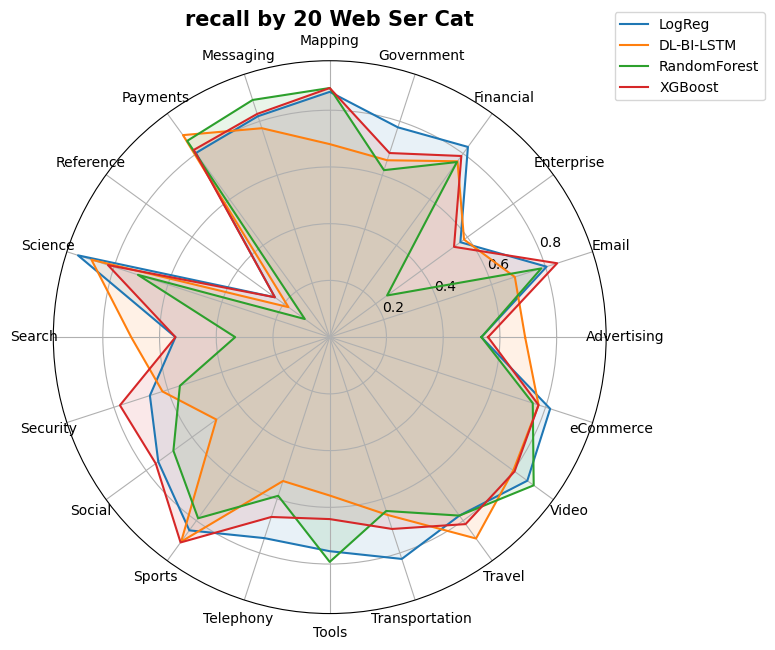

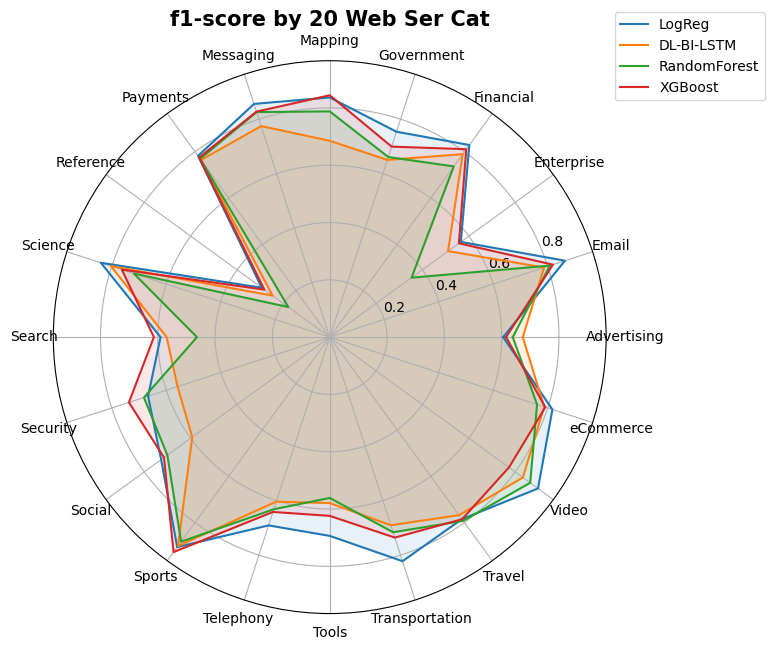

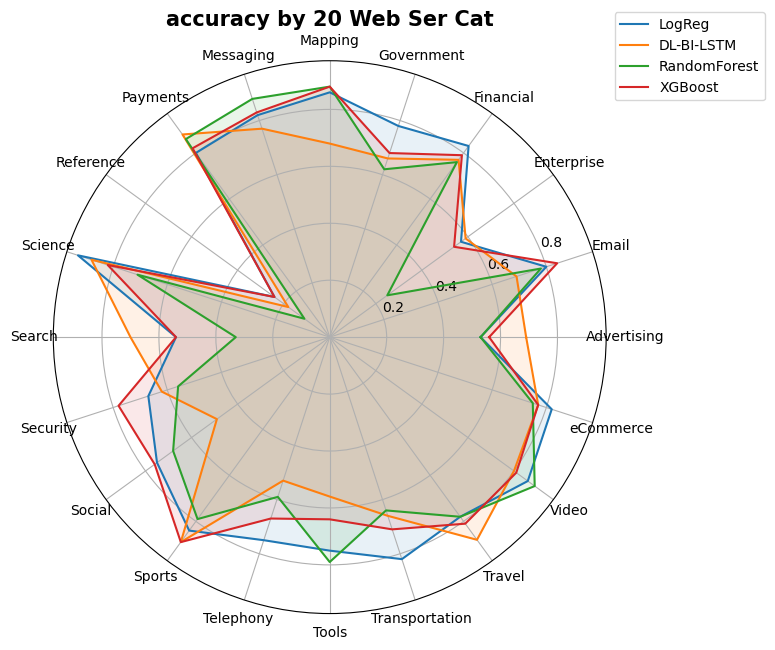

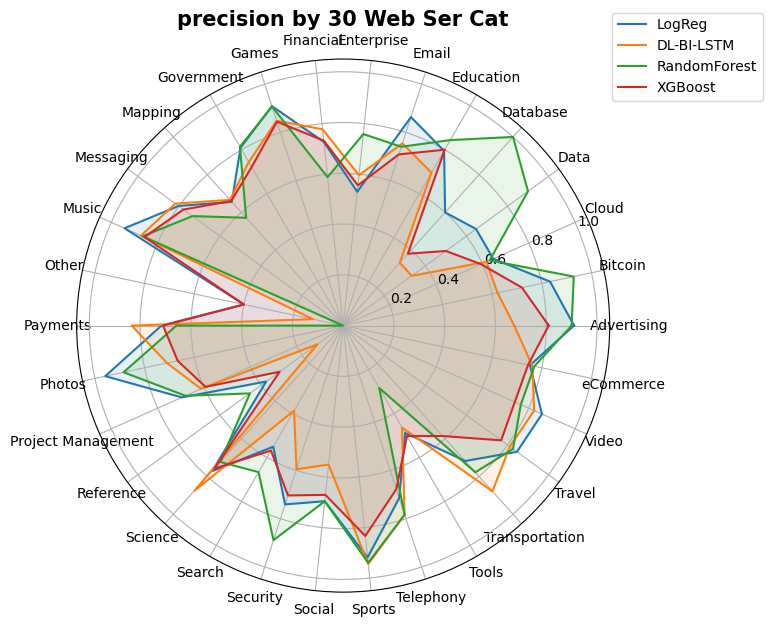

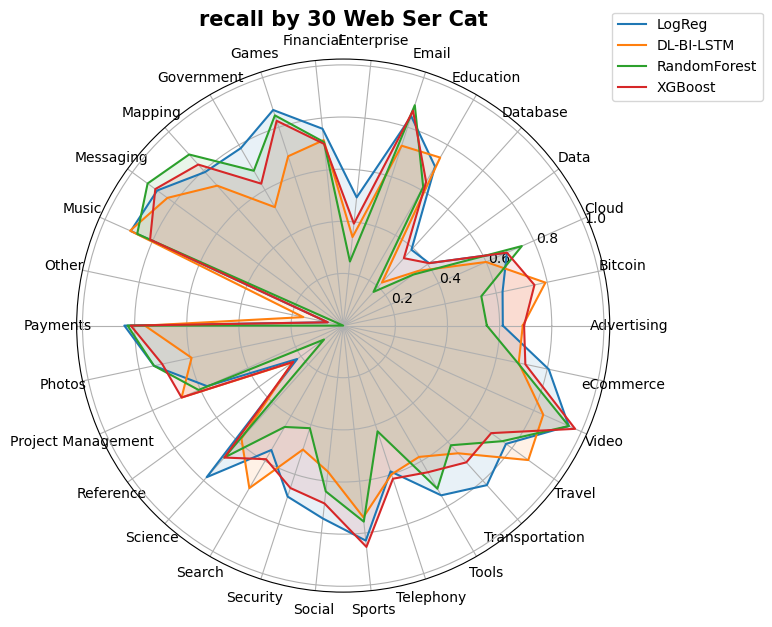

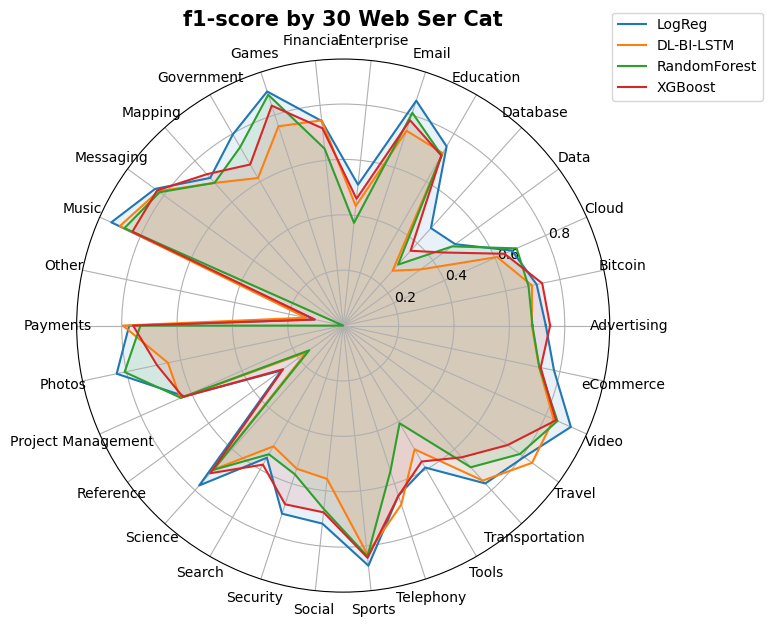

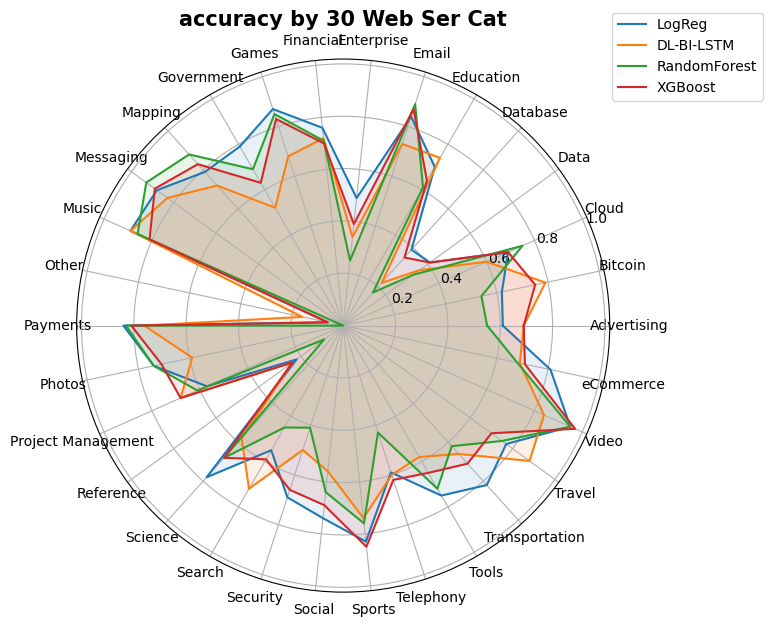

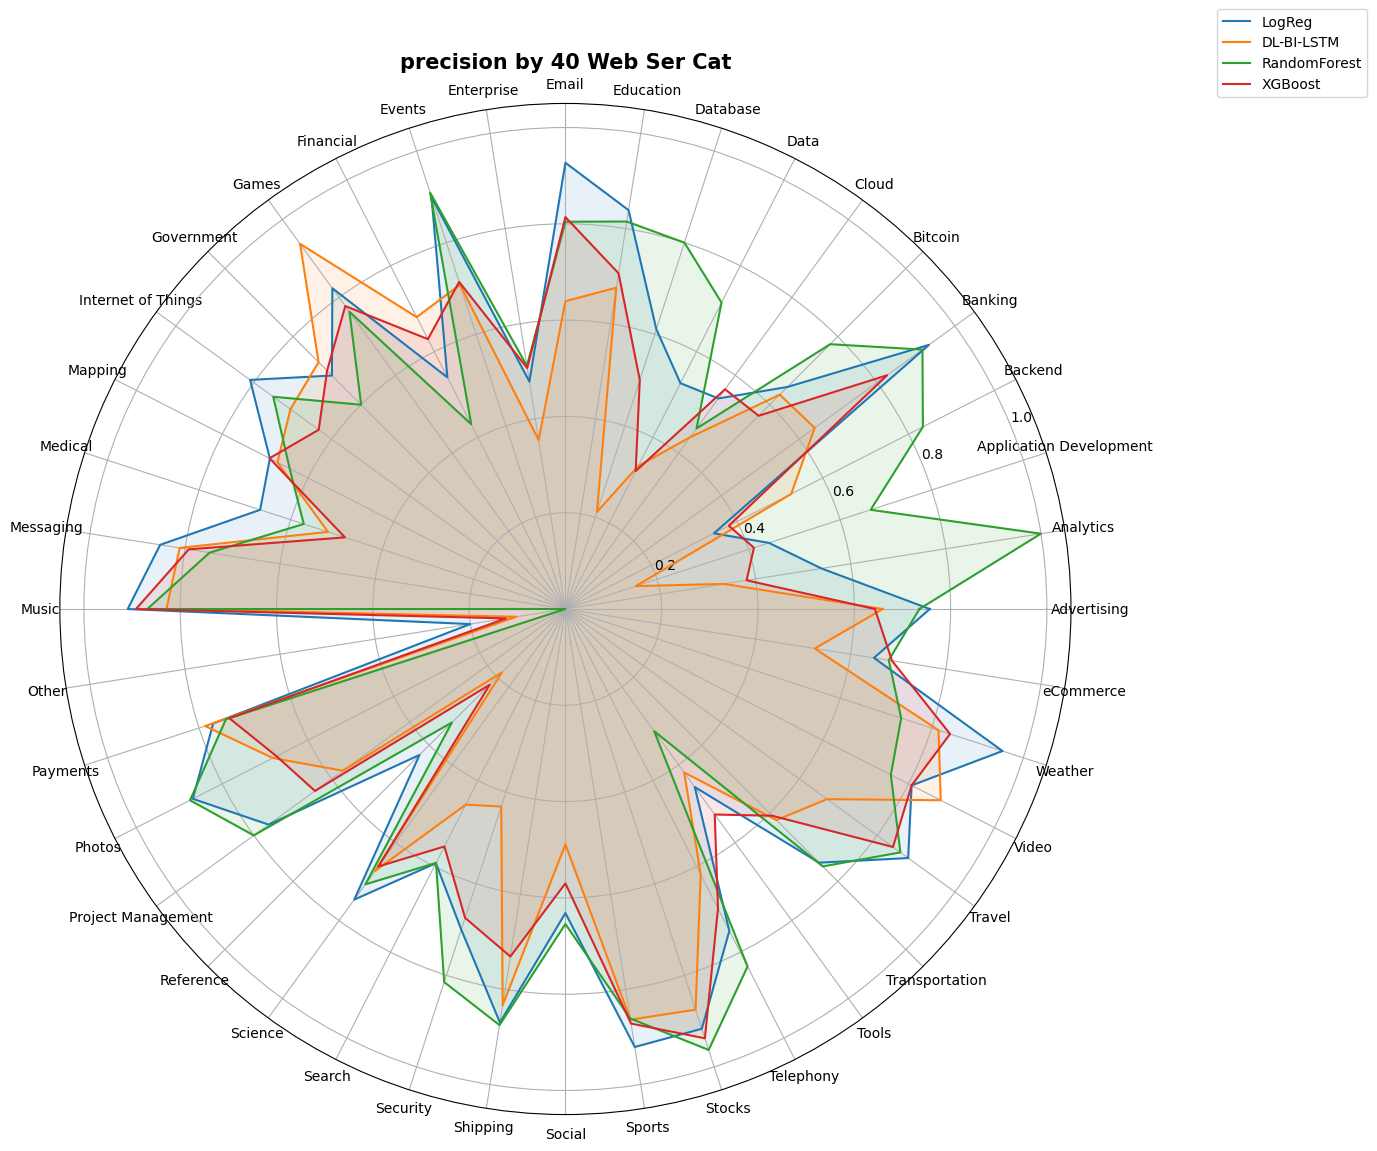

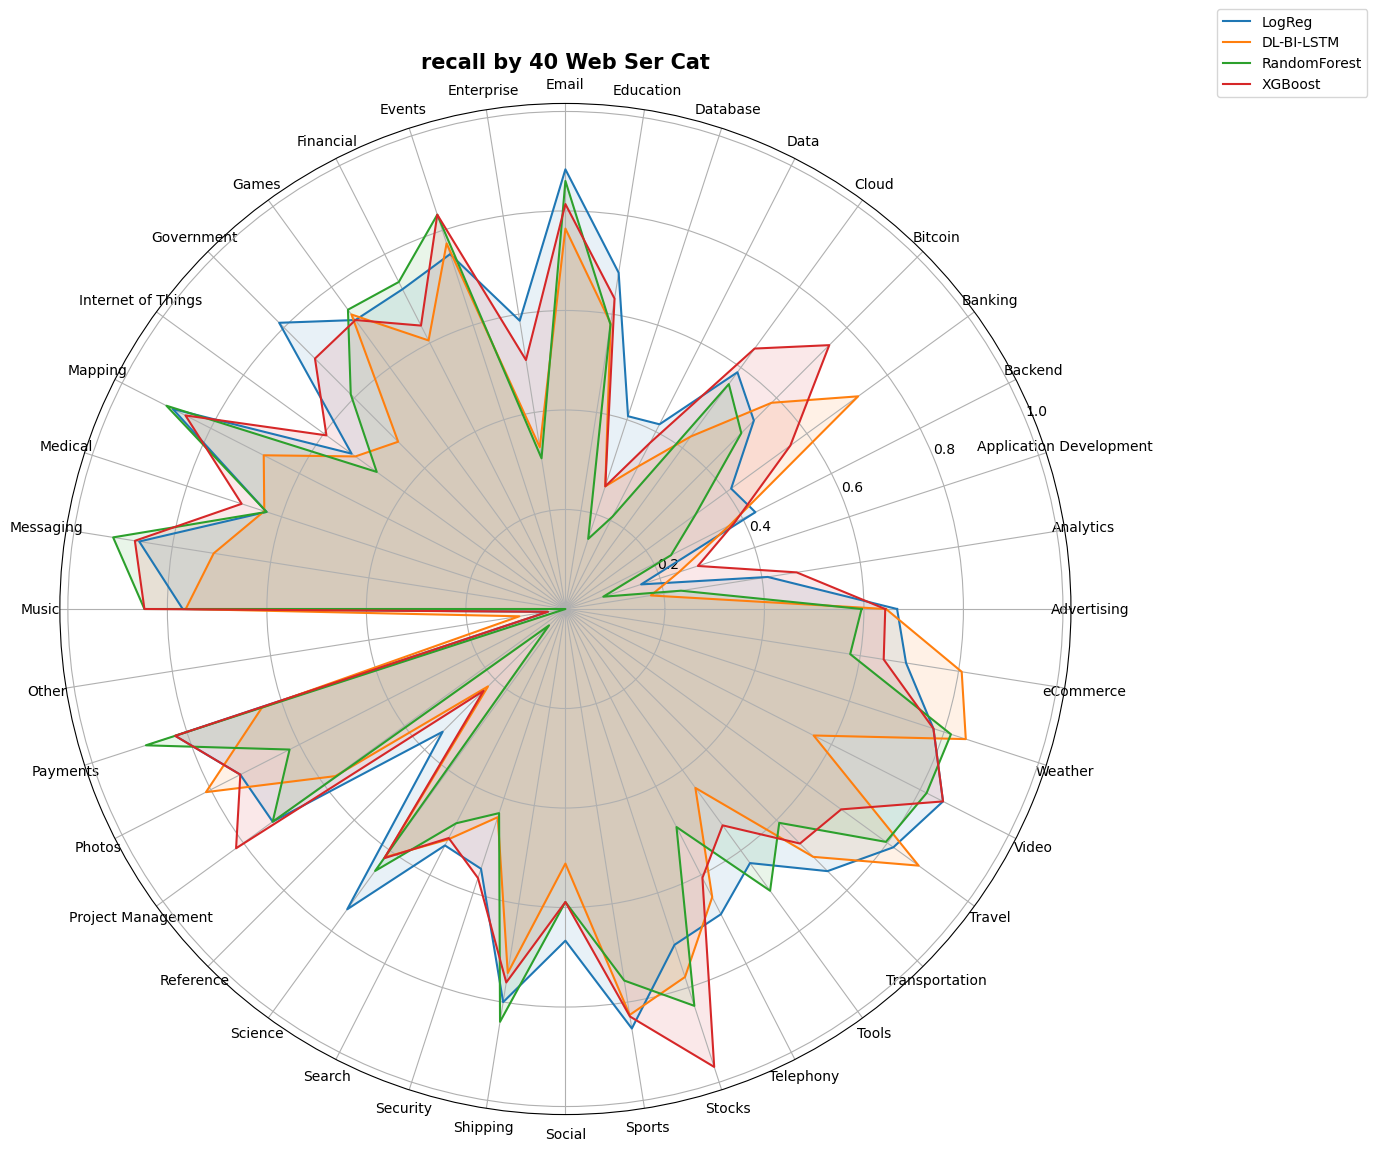

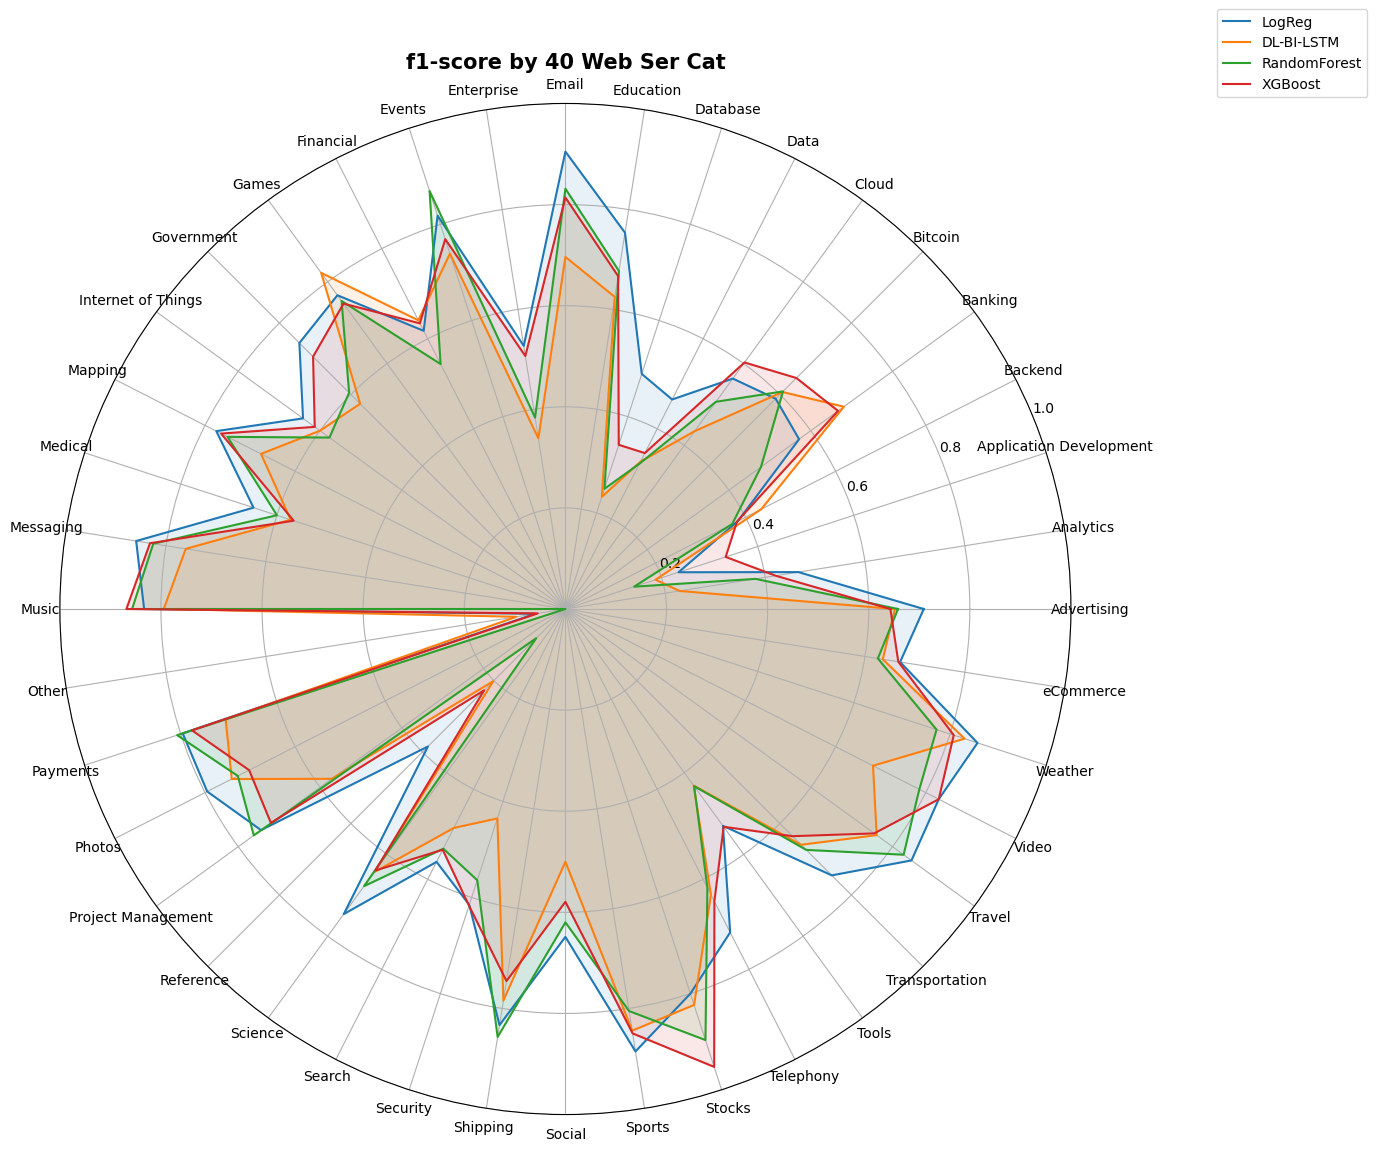

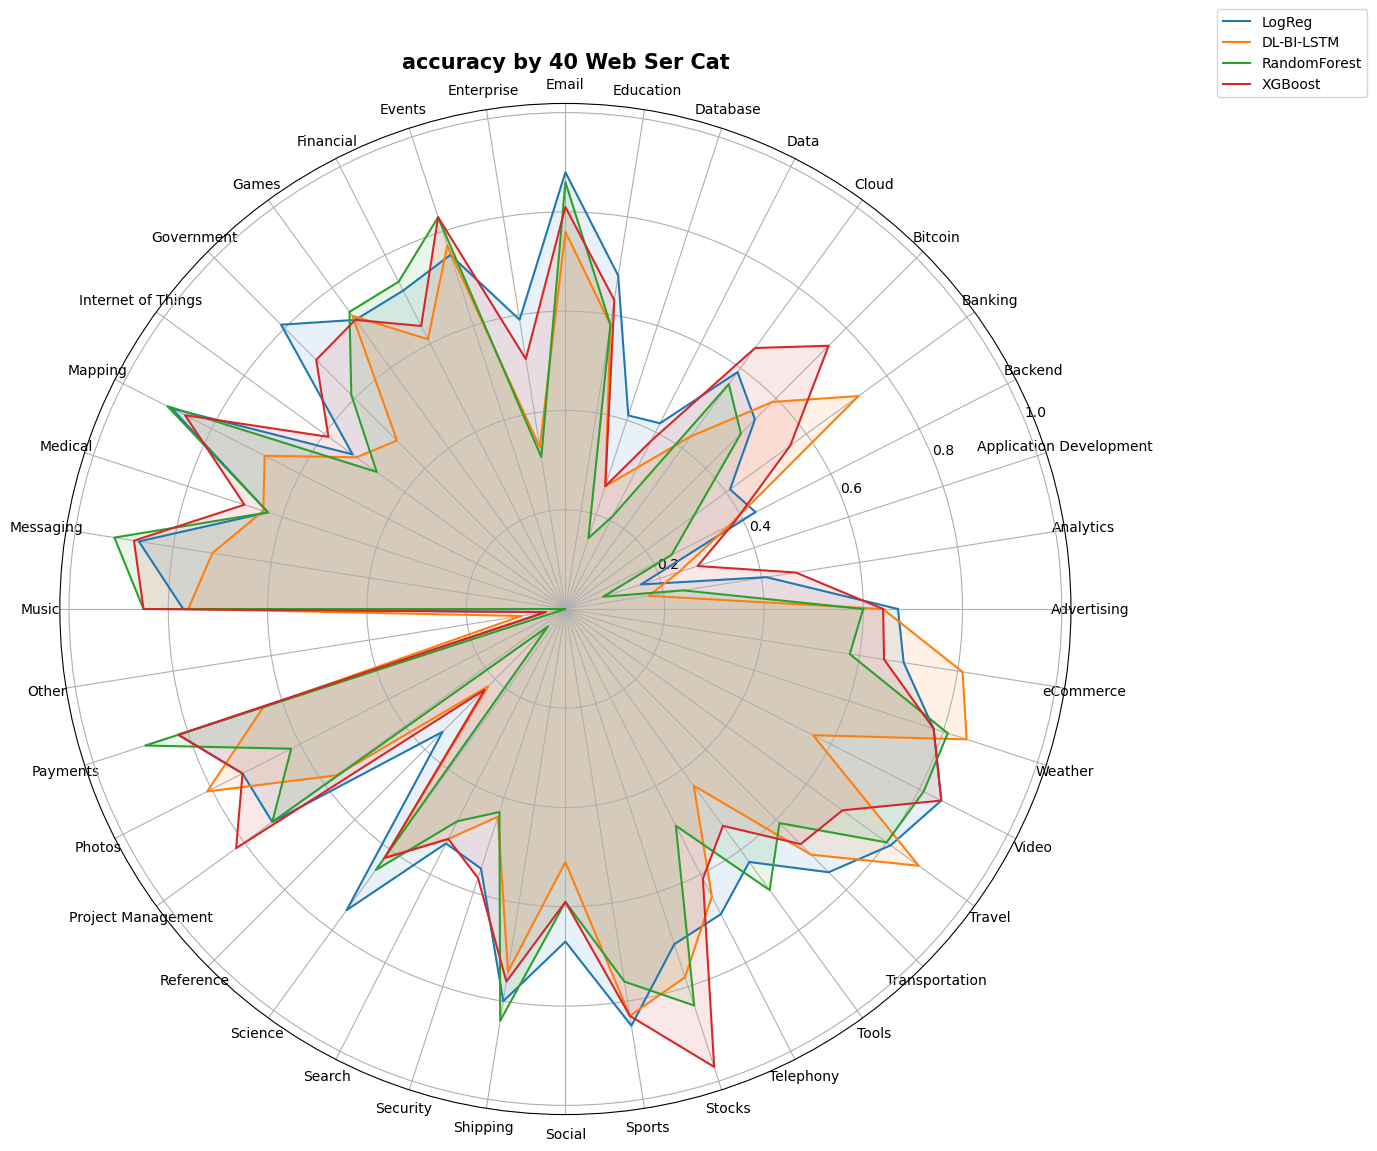

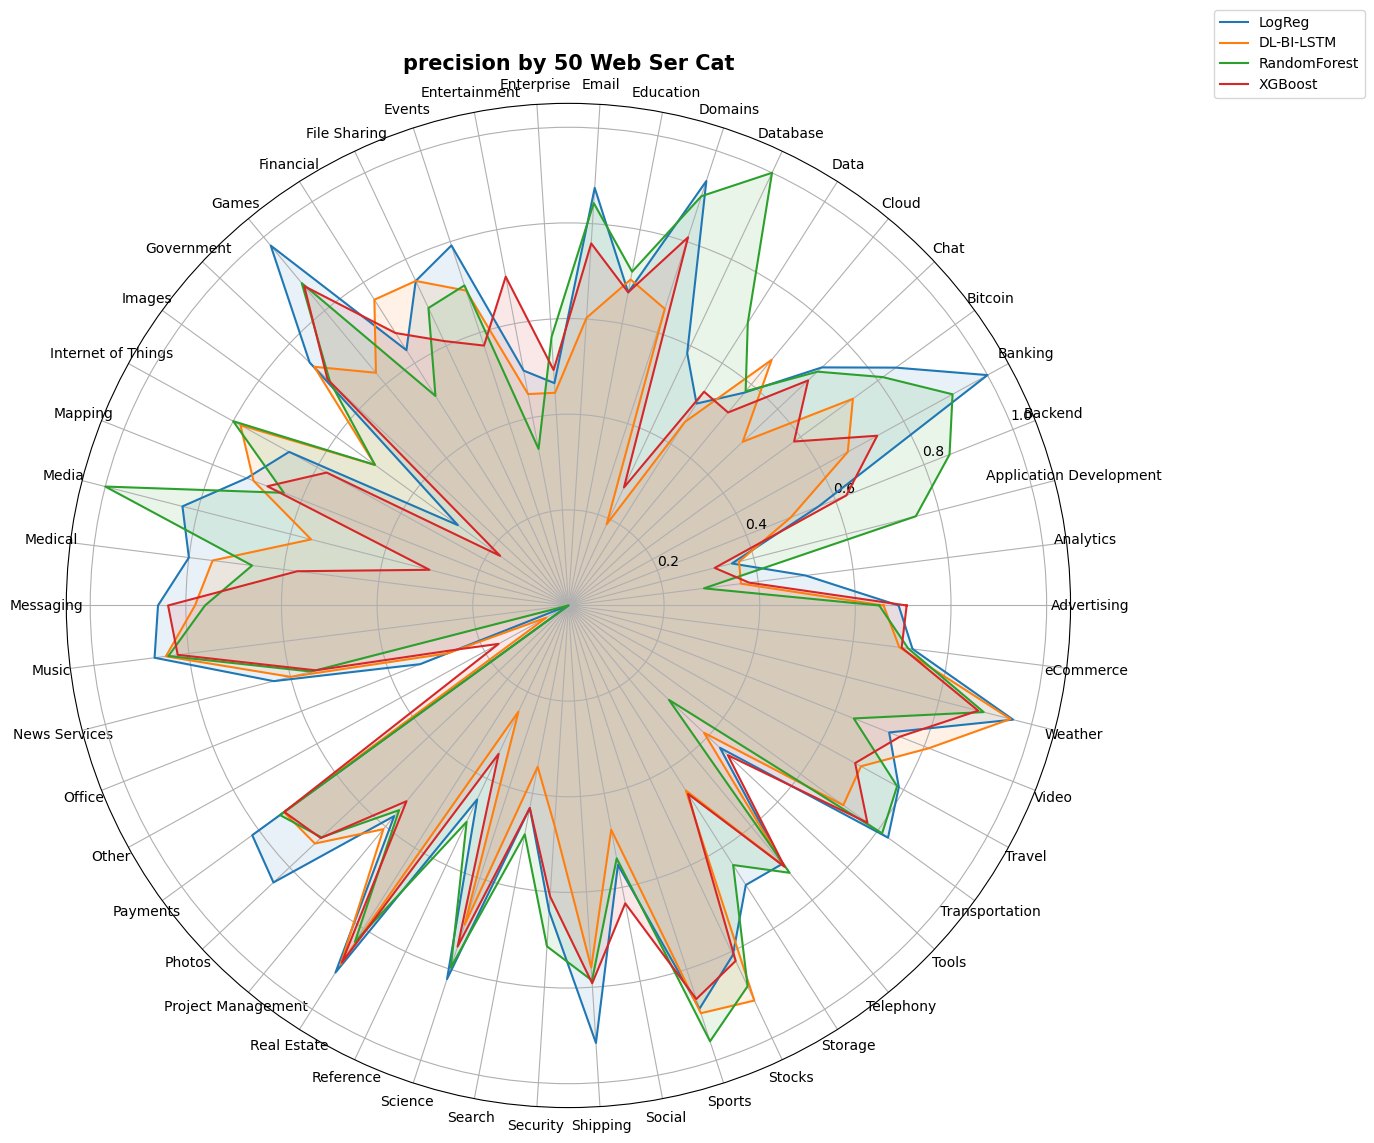

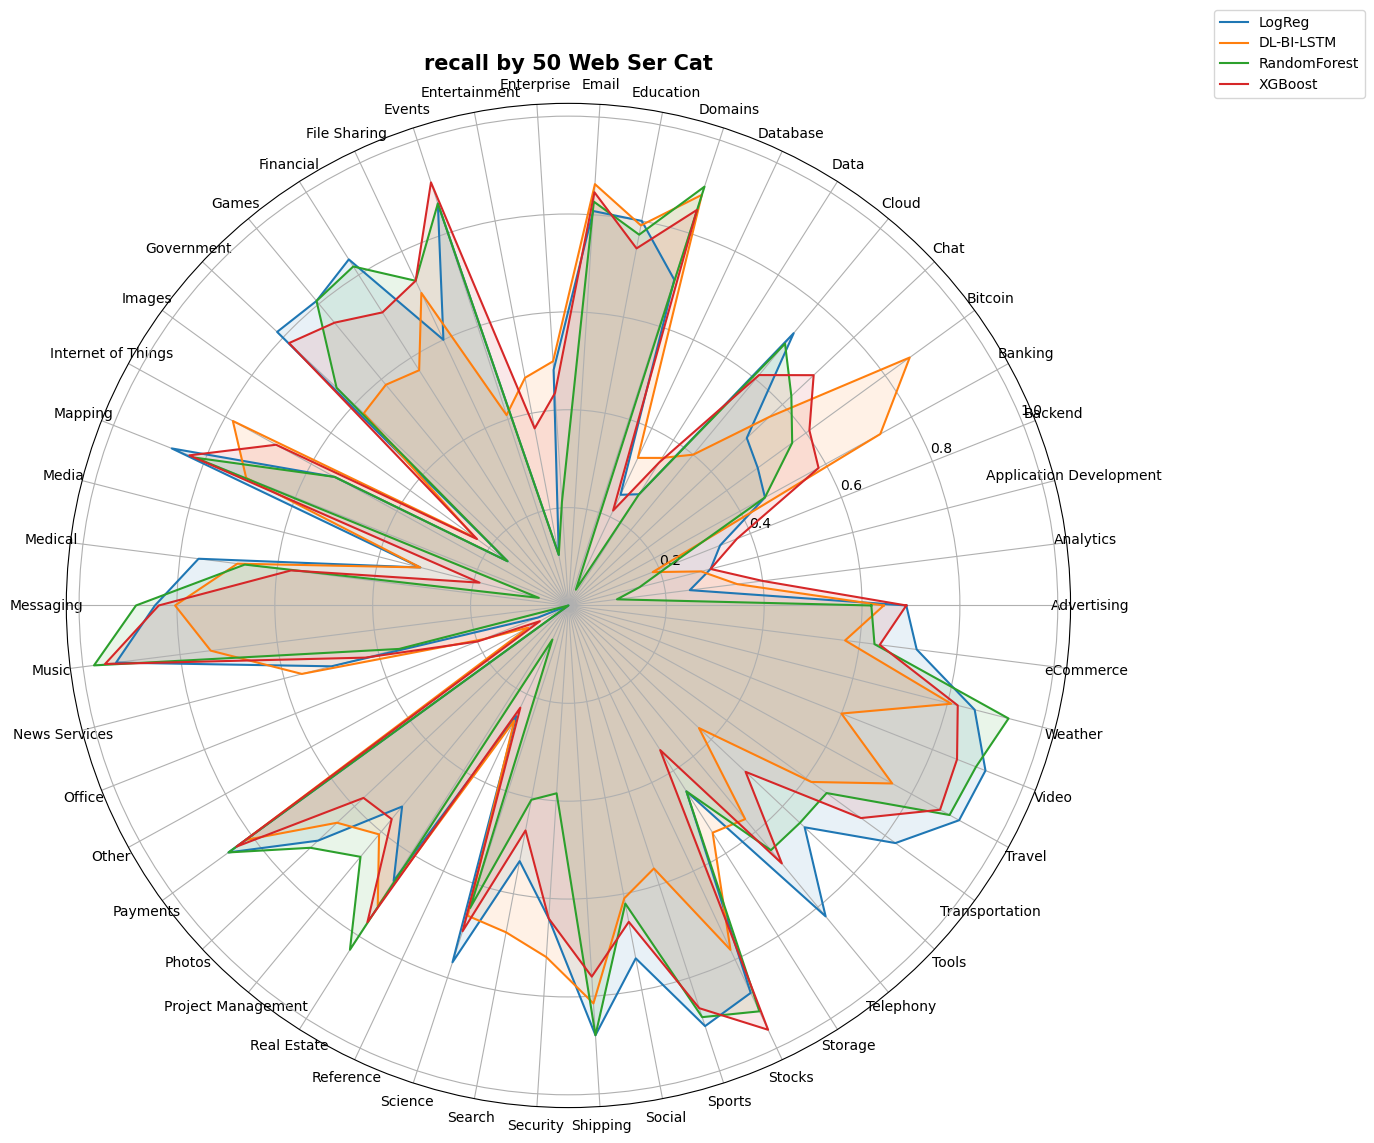

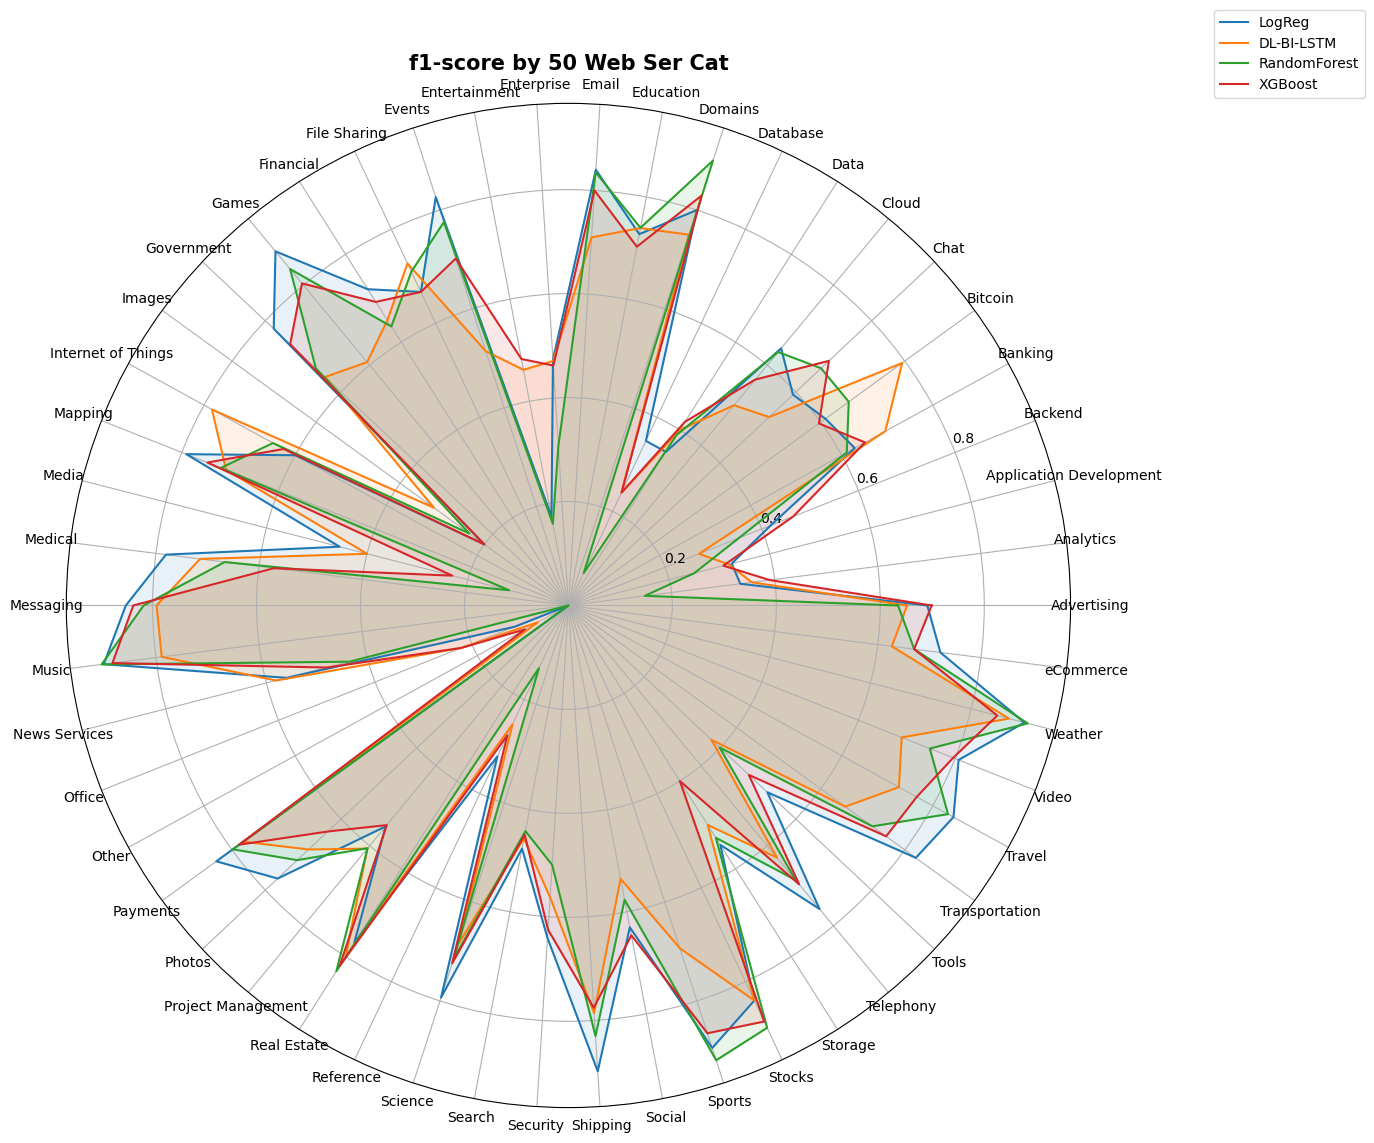

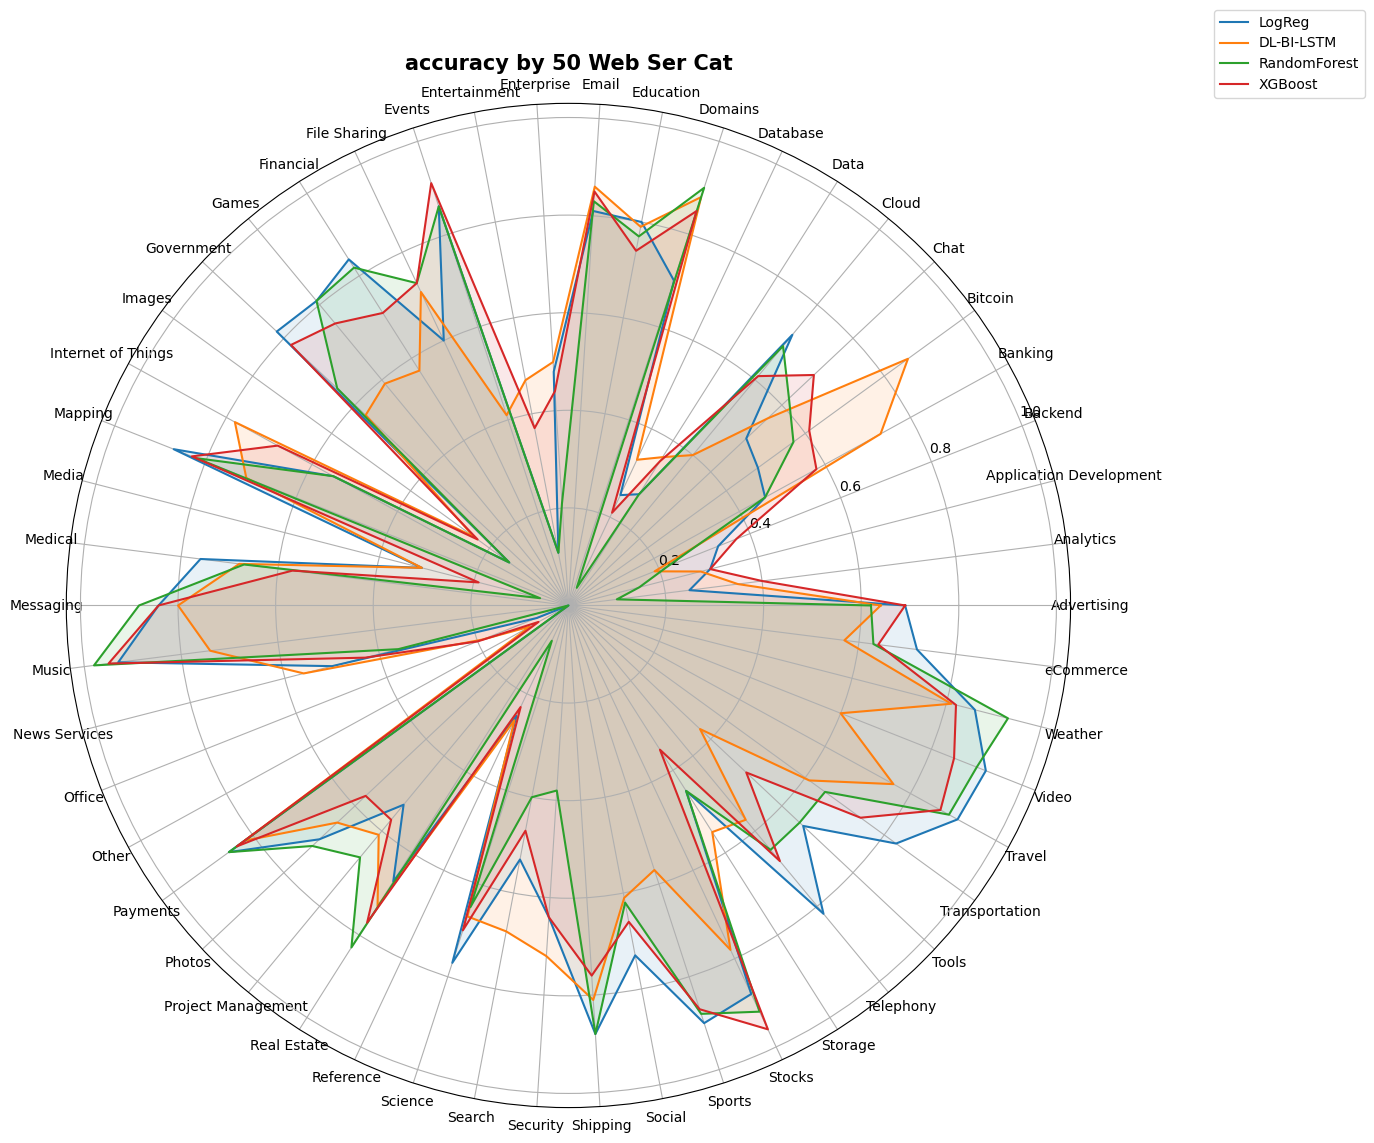

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi

for num_cat in [10,20,30,40,50]:
    # List of files with labels
    files = {
        "LogReg": f"results/ML-Report-LogReg TFIDF+SBERT Top {num_cat}.csv",
        "DL-BI-LSTM": f"results/DL-Report-BI-LSTM Top {num_cat}.csv",
        "RandomForest": f"results/ML-Report-RF TFIDF+SBERT Top {num_cat}.csv",
        "XGBoost": f"results/ML-Report-XGB TFIDF+SBERT Top {num_cat}.csv"
    }

    # Load all files
    data = {}
    for model, file in files.items():
        df = pd.read_csv(file, sep=None, engine="python")
        df.set_index('Category', inplace=True)
        data[model] = df

    # Function to plot radar chart for a specific metric
    def plot_radar(metric):
        labels = data[list(data.keys())[0]].index.tolist()
        num_labels = len(labels)
        angles = [n / float(num_labels) * 2 * pi for n in range(num_labels)]
        angles += angles[:1]

        plt.figure(figsize=(8, 8) if num_cat < 40 else (14, 14))
        ax = plt.subplot(111, polar=True)

        for model_name, df in data.items():
            values = df[metric].tolist()
            values += values[:1]
            ax.plot(angles, values, label=model_name)
            ax.fill(angles, values, alpha=0.1)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels)
        ax.set_title(f'{metric} by {num_cat} Web Ser Cat', size=15, weight='bold')
        plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
        plt.tight_layout()
        plt.show()

    # Plot for each metric
    metrics = ['precision', 'recall', 'f1-score', 'accuracy']
    for m in metrics:
        plot_radar(m)
